# Case


# Formål: 
Sensor data analyse og en tenkt løsning som kan redusere risikoen for at nedrivning av kontaktledning skjer. 
# Planen
1. Samle alle json data.
2. Dataforbehandling (data pre-prosessing).
3. Forskning på modeller som passer for data. 
4. Trener og tester modeller.
5. Evaluering av modeller.

In [143]:
# importerer nødvendige biblioteker.

import numpy as np
import pandas as pd 
import glob
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
%matplotlib inline


# 1. Samle alle json data.

In [146]:
# samle alle data 
paths = Path("C:/Users/meng_/Documents/BaneNOR/ds_case_data/sensor_data").glob("*.json")
df = pd.DataFrame([pd.read_json(p, typ="series") for p in paths])
df. head(10)

,timestamp,event_id,train_id,incident,kontaktkraft,hastighet,location_type,wind_speed,wind_direction,distance_to_pole
0,2023-06-28T12:15:37.364846,001430ec-9610-4d44-b3a9-d343f0aa51eb,1,0,83.872662,117.755775,open_landscape,3.124610,270.0,1.100474
1,2023-06-28T12:16:28.418844,00269f99-e96e-44ff-9be4-f940b4bfc699,9,0,58.155822,110.932093,open_landscape,5.230047,225.0,23.024499
2,2023-06-28T12:17:01.799848,0057bcb9-2462-4720-8e29-b2b76eed508b,7,0,69.277202,103.387549,open_landscape,9.107790,0.0,1.348549
3,2023-06-28T12:16:45.958846,005df8bd-f9e6-45a0-9e50-832b09f556f6,1,0,64.778042,121.418338,town,3.306424,270.0,11.052287
4,2023-06-28T12:16:37.658846,005f7833-83d9-42fa-9a34-4575e92a399e,0,0,57.867363,108.814555,open_landscape,1.921198,0.0,21.474802
5,2023-06-28T12:16:04.662846,0063a0c4-03e8-44fe-be25-4a5c441b6cd5,1,1,35.929347,121.676931,open_landscape,3.144162,270.0,12.108891
6,2023-06-28T12:16:44.929848,00651aa5-d218-4949-9c6b-6128cc79e71f,7,0,55.780717,103.610598,open_landscape,8.939101,0.0,12.192199
7,2023-06-28T12:16:35.243846,00a3d1d4-fde2-4502-a5ed-7b3780f44d0d,0,1,34.987745,107.766239,open_landscape,1.856061,0.0,23.103814
8,2023-06-28T12:16:55.135945,00a5f033-2058-4cc6-82d6-77bda6462524,4,0,66.789109,102.027474,open_landscape,13.992718,270.0,1.413215
9,2023-06-28T12:15:55.409846,00b65c62-b525-475c-a630-eed4fb62c6bf,2,1,23.786930,91.293280,town,7.506408,135.0,1.064614


# 2. Dataforbehandling

In [147]:
# endrer dato format
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [148]:
# eksporterer alle data til en excel fil. 
df.to_excel('eltog.xlsx', sheet_name='alldata')

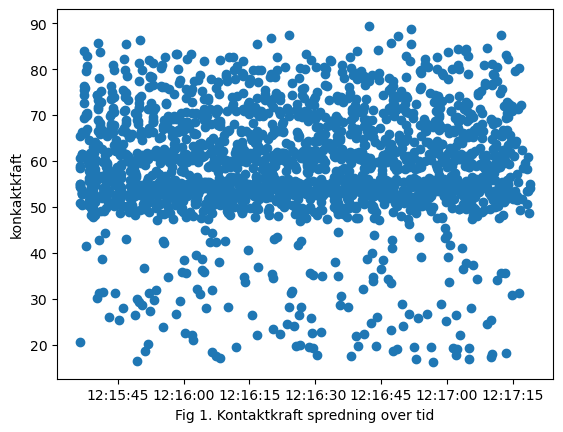

In [203]:
# viser data og prøver å finne ut forhold innimellom de dataene. 
x = df[["timestamp"]]
y = df["kontaktkraft"]
plt.scatter(x,y)
plt.xlabel("Fig 1. Kontaktkraft spredning over tid")
plt.ylabel("konkaktkfaft")
plt.show()

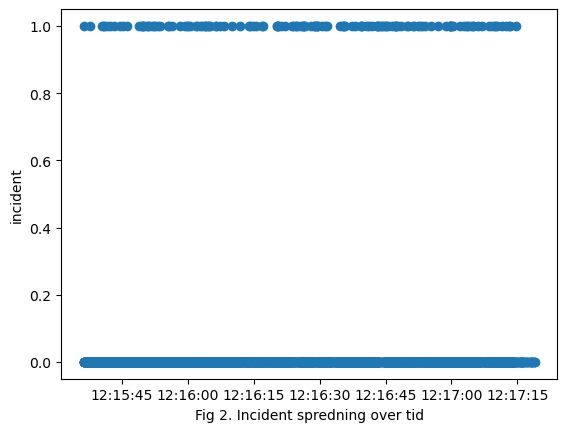

In [195]:
x = df[["timestamp"]]
y = df["incident"]
plt.scatter(x,y)
plt.xlabel("Fig 2. Incident spredning over tid")
plt.ylabel("incident")
plt.show()

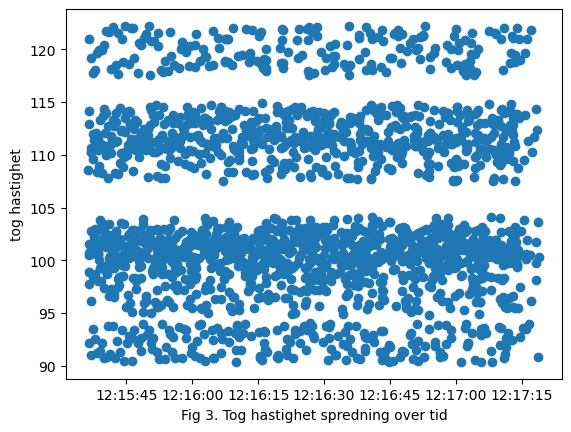

In [204]:
x = df[["timestamp"]]
y = df["hastighet"]
plt.scatter(x,y)
plt.xlabel("Fig 3. Tog hastighet spredning over tid")
plt.ylabel("tog hastighet")
plt.show()

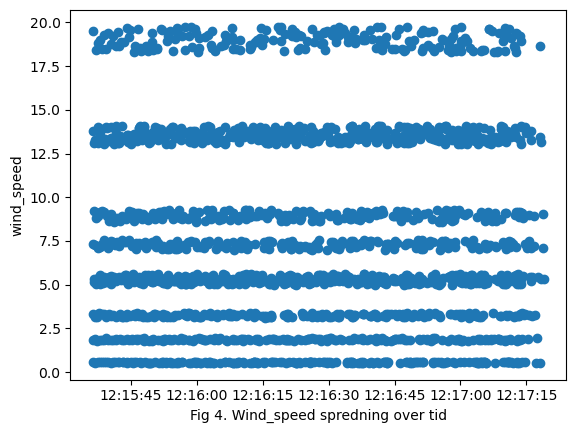

In [197]:
x = df[["timestamp"]]
y = df["wind_speed"]
plt.scatter(x,y)
plt.xlabel("Fig 4. Wind_speed spredning over tid")
plt.ylabel("wind_speed")
plt.show()


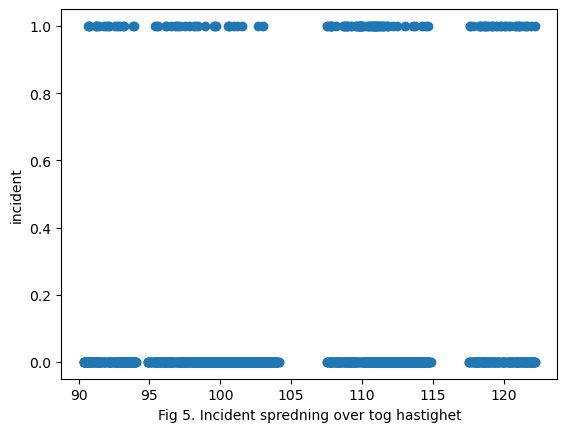

In [205]:
x = df[["hastighet"]]
y = df["incident"]
plt.scatter(x,y)
plt.xlabel("Fig 5. Incident spredning over tog hastighet")
plt.ylabel("incident")
plt.show()

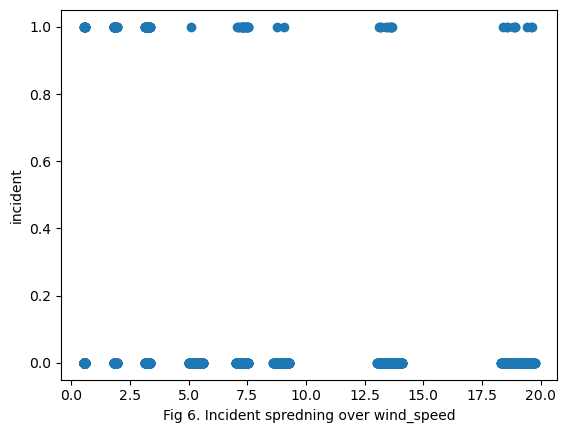

In [206]:
x = df[["wind_speed"]]
y = df["incident"]
plt.scatter(x,y)
plt.xlabel("Fig 6. Incident spredning over wind_speed")
plt.ylabel("incident")
plt.show()

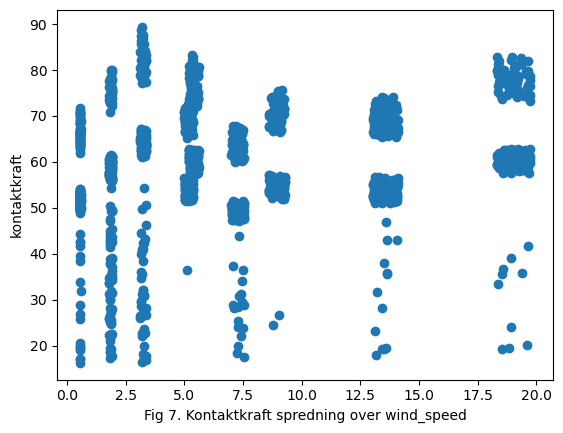

In [207]:
x = df[["wind_speed"]]
y = df["kontaktkraft"]
plt.scatter(x,y)
plt.xlabel("Fig 7. Kontaktkraft spredning over wind_speed")
plt.ylabel("kontaktkraft")
plt.show()

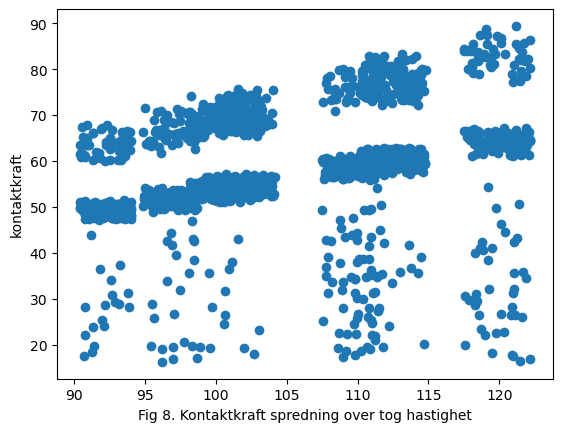

In [208]:
x = df[["hastighet"]]
y = df["kontaktkraft"]
plt.scatter(x,y)
plt.xlabel("Fig 8. Kontaktkraft spredning over tog hastighet")
plt.ylabel("kontaktkraft")
plt.show()

# Det virker at incident er avhengig av kontaktkraft. 
Vi splitter data inntil to gruppe: en gruppe for data med incident = 0, en annen gruppe med incident =1.

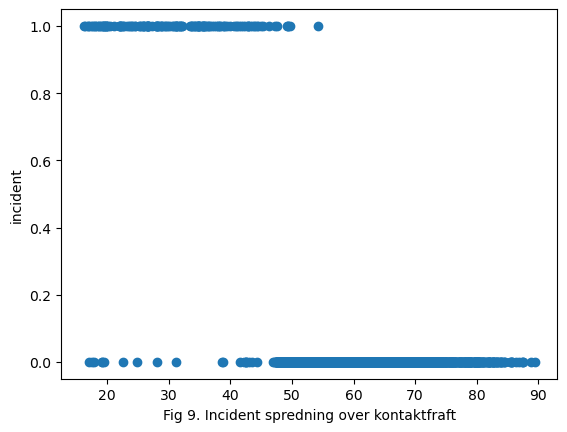

In [209]:
x = df[["kontaktkraft"]]
y = df["incident"]
plt.scatter(x,y)
plt.xlabel("Fig 9. Incident spredning over kontaktfraft")
plt.ylabel("incident")
plt.show()

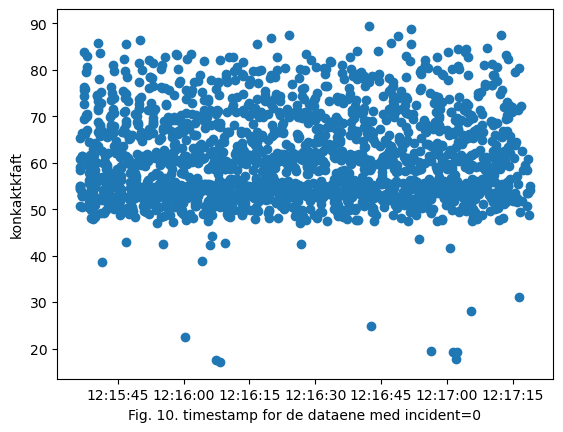

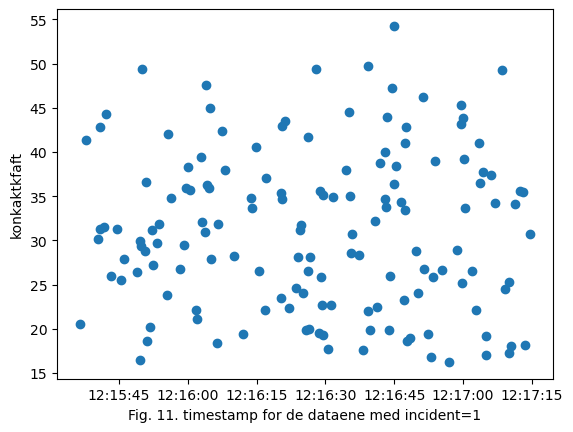

In [211]:
# Vi splitter data inntil to gruppe: en gruppe for data med incident = 0, en annen gruppe med incident =1.

df1, df2 = df.loc[df['incident'] == 0],df.loc[df['incident'] == 1 ]

xfilt1 = df1[["timestamp"]]
yfilt1 = df1["kontaktkraft"]


plt.scatter(xfilt1,yfilt1)
plt.xlabel("Fig. 10. timestamp for de dataene med incident=0")
plt.ylabel("konkaktkfaft")
plt.show()

xfilt2= df2["timestamp"]
yfilt2= df2["kontaktkraft"]


plt.scatter(xfilt2,yfilt2)
plt.xlabel("Fig. 11. timestamp for de dataene med incident=1")
plt.ylabel("konkaktkfaft")
plt.show()

# 3. Forskning på modeller logistiskregresjon, randomforest, gradientboosting. Disse tre klassifiseringsmodeller passer for denne data analyse.
Logistisk regresjon er best for enkle, binære klassifiseringsproblemer med lineære beslutningsgrenser, og når enkelhet og tolkbarhet er prioritert.

Random Forest og Gradient Boosting er mer egnet for komplekse klassifiseringsproblemer hvor forholdet mellom funksjonene ikke nødvendigvis er lineært.

Random Forest er mer robust mot overtilpasning og krever mindre tuning, mens Gradient Boosting ofte gir høyere presisjon, men er mer utsatt for overtilpasning og krever nøye hyperparameter tuning.


# 4. Trener og tester modeller.

In [178]:
# enkel logistiskregresjion

def kontaktkraft_incident_logistiskregresjon():

    x = df[["kontaktkraft"]]
    y = df["incident"]
    
    #forberedelse av data

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=97)
    
    # Initialiserer og trener en logistisk regresjonsmodell
    model = LogisticRegression()
    model.fit(x_train, y_train)

    # Gjør prediksjoner på testsettet
    y_pred = model.predict(x_test)

    # Evaluerer modellens prestasjon
    print(f"Accuracy of simple logistic regression: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))   

In [179]:
# enkel randomforest
def kontaktkraft_incident_randomforest():
    x = df[["kontaktkraft"]]
    y = df["incident"]
    
    #forberedelse av data
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=97)
    
    # Initialiserer og trener en logistisk regresjonsmodell
    clf = RandomForestClassifier(n_estimators=100, random_state=57)
    clf.fit(x_train, y_train)
    # Gjør prediksjoner på testsettet
    y_pred = clf.predict(x_test)

    # Evaluerer modellens prestasjon
    print(f"Accuracy of simple random forest: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

In [180]:
# enkel radientboosting
def kontaktkraft_incident_gradientboosting():
    x = df[["kontaktkraft"]]
    y = df["incident"]
    
    #forberedelse av data
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=97)
    
    # Initialiserer og trener en gradient boosting modell
    gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=97)
    gbc.fit(x_train, y_train)
    
    # Gjør prediksjoner på testsettet
    y_pred = gbc.predict(x_test)

    # Evaluerer modellens prestasjon
    print(f"Accuracy of simple gradient boosting: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

In [185]:
# multippel logistikkregresjion
def kontaktkraft_incident_logistiskregresjon2():

    x = df[["kontaktkraft","wind_speed" ]]
    y = df["incident"]
    
    #forberedelse av data

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=97)
    
    # Initialiserer og trener en logistisk regresjonsmodell
    model = LogisticRegression()
    model.fit(x_train, y_train)

    # Gjør prediksjoner på testsettet
    y_pred = model.predict(x_test)

    # Evaluerer modellens prestasjon
    print(f"Accuracy of multiple logistic regression: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

In [186]:
# multippel random forest
def kontaktkraft_incident_randomforest2():
    x = df[["kontaktkraft","wind_speed"]]
    y = df["incident"]
    
    #forberedelse av data
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=97)
    
    # Initialiserer og trener en logistisk regresjonsmodell
    clf = RandomForestClassifier(n_estimators=100, random_state=57)
    clf.fit(x_train, y_train)
    # Gjør prediksjoner på testsettet
    y_pred = clf.predict(x_test)

    # Evaluerer modellens prestasjon
    print(f"Accuracy of multiple random forest: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

In [187]:
# multippel gradientboosting
def kontaktkraft_incident_gradientboosting2():
    x = df[["kontaktkraft","wind_speed"]]
    y = df["incident"]
    
    #forberedelse av data
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=97)
    
    # Initialiserer og trener en gradient boosting modell
    gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=97)
    gbc.fit(x_train, y_train)
    
    # Gjør prediksjoner på testsettet
    y_pred = gbc.predict(x_test)

    # Evaluerer modellens prestasjon
    print(f"Accuracy of multiple gradient boosting: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

In [188]:
if __name__ == "__main__":
    kontaktkraft_incident_logistiskregresjon()
    kontaktkraft_incident_randomforest()
    kontaktkraft_incident_gradientboosting()
    kontaktkraft_incident_logistiskregresjon2()
    kontaktkraft_incident_randomforest2()
    kontaktkraft_incident_gradientboosting2()


Accuracy of simple logistic regression: 0.9833333333333333
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       558
           1       0.90      0.86      0.88        42

    accuracy                           0.98       600
   macro avg       0.94      0.92      0.93       600
weighted avg       0.98      0.98      0.98       600

[[554   4]
 [  6  36]]
Accuracy of simple random forest: 0.98
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       558
           1       0.88      0.83      0.85        42

    accuracy                           0.98       600
   macro avg       0.93      0.91      0.92       600
weighted avg       0.98      0.98      0.98       600

[[553   5]
 [  7  35]]
Accuracy of simple gradient boosting: 0.93
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       558
           1       0.00      0.00      0.00       

C:\Programs\Python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Programs\Python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Programs\Python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy of multiple random forest: 0.9883333333333333
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       558
           1       0.87      0.98      0.92        42

    accuracy                           0.99       600
   macro avg       0.94      0.98      0.96       600
weighted avg       0.99      0.99      0.99       600

[[552   6]
 [  1  41]]
Accuracy of multiple gradient boosting: 0.93
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       558
           1       0.00      0.00      0.00        42

    accuracy                           0.93       600
   macro avg       0.47      0.50      0.48       600
weighted avg       0.86      0.93      0.90       600

[[558   0]
 [ 42   0]]


C:\Programs\Python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Programs\Python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Programs\Python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [177]:
# When ``true positive + false positive == 0``, precision is undefined.   When ``true positive + false negative == 0``, 
# recall is undefined. In such cases, by default the metric will be set to 0, as will f-score, and ``UndefinedMetricWarning`` 
# will be raised. This behavior can be modified with ``zero_division``.
# no need to hide this warning as we might miss some important information in the future if we hide it.

# 5. Evaluering av modeller.
Incident er bare avhengig av kontaktkraft. Andre faktorer som tog hastighet, wind_speed pavirker ikke incident. 
Det viser at logistikkregresjon og randomforest passer bedre for analyse med høyere nøyaktighet enn gradientboosting.